In [26]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.preprocessing import Normalizer
from sklearn.metrics import rand_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

#### `Варіант 20`

- `N` = 100
- `Метод:` Isomap
- `D1` = 5
- `D2` = 15

#### 1) Завантаження датасету картинок з цифрами та його вивід

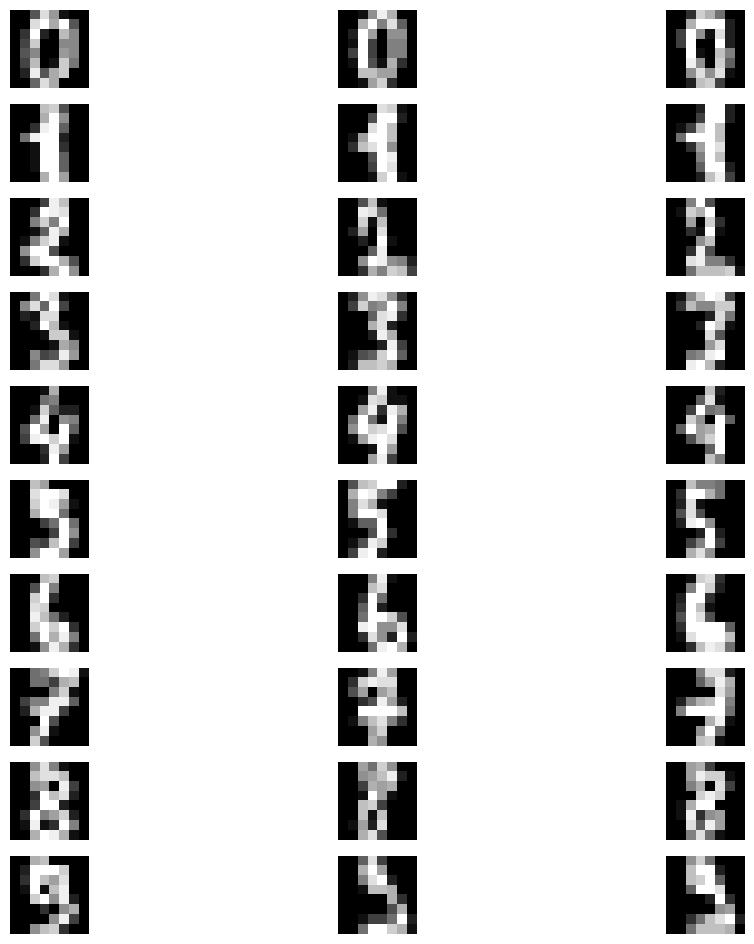

In [27]:
digits = load_digits()
# кількіть елементів класу
N = 100
selected_data = np.empty((0, digits.data.shape[1]))

for i in range(10):
    digit_data = digits.data[digits.target == i][:N]
    selected_data = np.concatenate((selected_data, digit_data), axis=0)

num_samples_per_class = 3

# Нормалізація
normalized_data = Normalizer().fit_transform(selected_data)

# Вивід на єкран прикладів
fig, axs = plt.subplots(10, num_samples_per_class, figsize=(12, 12))

for i in range(10):
    for j in range(num_samples_per_class):
        index = i * N + j
        axs[i, j].imshow(normalized_data[index].reshape(8, 8), cmap='gray')
        axs[i, j].axis('off')

plt.show()

#### 2) Провести вкладення даних у простори розмiрностi 2 та 3 через метод головних компонент. Провести вiзуалiзацiю отриманих вкладень даних.

In [28]:
def plot_methods(data, visualization_type="2d"):
    # Визуализация в двумерном пространстве ISOMAP
    if visualization_type == "2d":
        plt.figure(figsize=(8, 8))
        plt.scatter(data[:, 0], data[:, 1], c=digits.target[: N * 10])
        plt.colorbar(label="Digit Class")
        plt.title("ISOMAP 2D Embedding")
        plt.show()
    # Визуализация в трехмерном пространстве ISOMAP
    elif visualization_type == "3d":
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection="3d")
        scatter = ax.scatter(
            data[:, 0], data[:, 1], data[:, 2], c=digits.target[: N * 10]
        )
        ax.set_title("ISOMAP 3D Embedding")
        plt.colorbar(scatter, label="Digit Class")
        plt.show()

In [21]:
# ініціалізація методу головних компонентів для 2д та 3д простору
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

# застосування методу головних компонентів для 2д та 3д простору
data_2d = pca_2d.fit_transform(normalized_data)
data_3d = pca_3d.fit_transform(normalized_data)

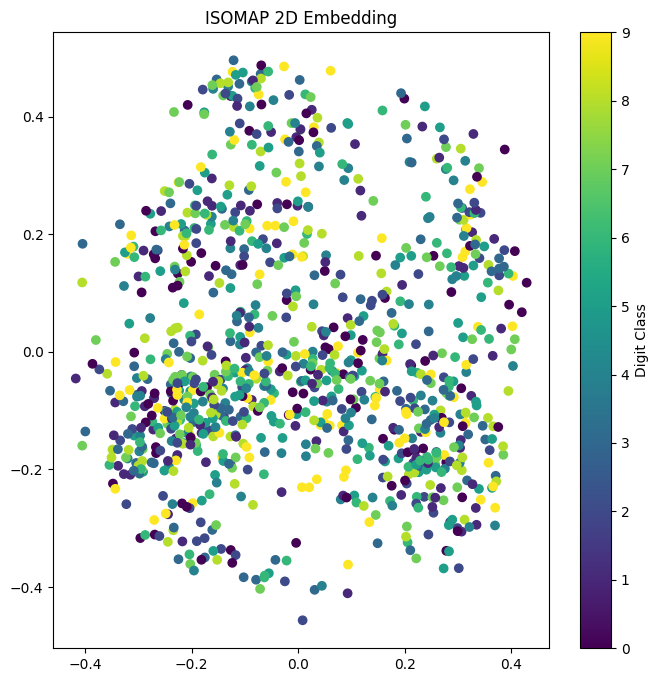

In [22]:
plot_methods(data_2d)

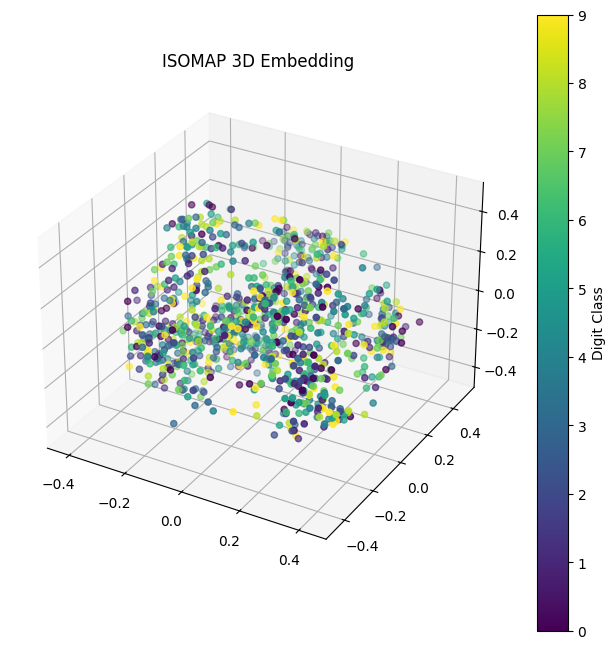

In [24]:
plot_methods(data_3d, "3d")

#### 3)  Провести вкладення даних у простори розмiрностi 2 та 3 через нелiнiйний метод зниження розмiрностi. Метод зниження розмiрностi обирається за варiантом. Провести вiзуалiзацiю отриманих вкладень даних.

In [30]:
# Ініціалізація моделі ISOMAP для просторів
isomap_2d = Isomap(n_components=2, n_neighbors=30)
isomap_3d = Isomap(n_components=3, n_neighbors=30)

# Застосування ISOMAP
data_2d_isomap = isomap_2d.fit_transform(normalized_data)
data_3d_isomap = isomap_3d.fit_transform(normalized_data)

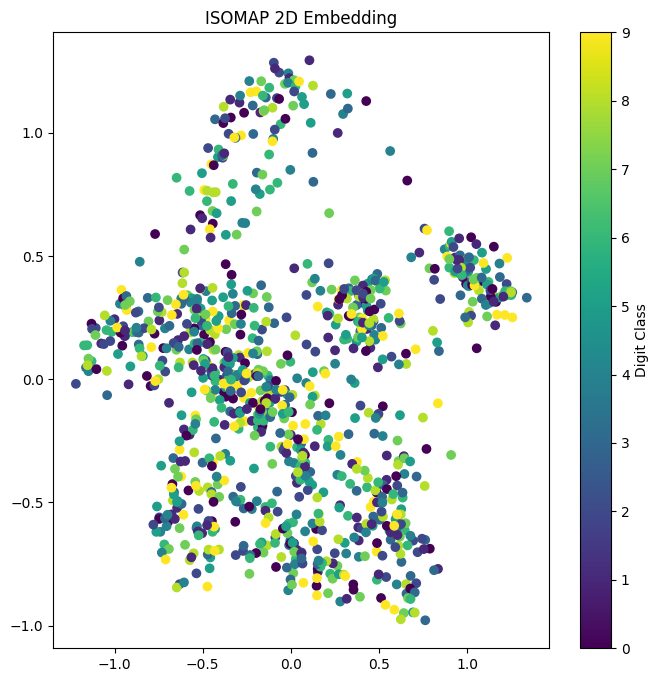

In [31]:
plot_methods(data_2d_isomap)

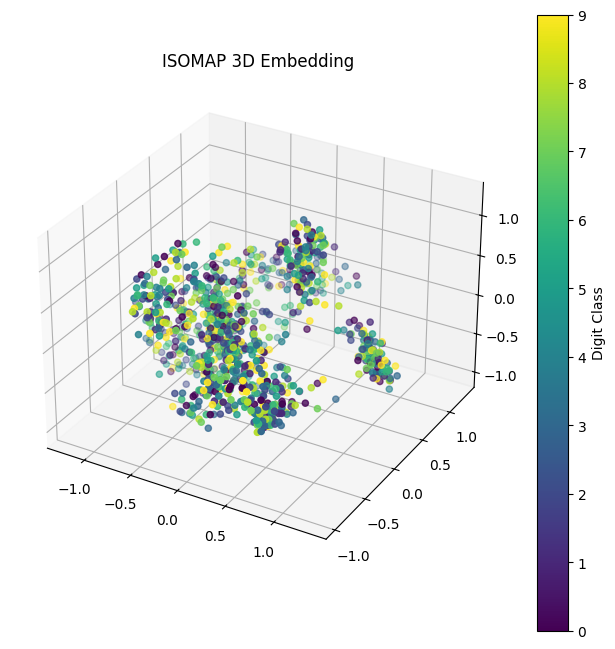

In [32]:
plot_methods(data_3d_isomap, "3d")

#### 4) Визначити оптимальну розмiрнiсть вкладення для лiнiйного та двох нелiнiйних методiв` (метод з п.4 i алгоритм tSNE)` шляхом перебору  розмiрностей з `дiапазону [d1, d2]` i розв’язання задачi кластеризацiї для даних, що вкладенi в простiр `d ∈ [d1, d2]`.

In [33]:
# задаємо діапазон d
d_range = range(5, 15)

In [34]:
isomap_score = []
for d in d_range:
    # метод зниження розмірності даних Isomap
    isomap_data = Isomap(n_components=d).fit_transform(normalized_data)
    # метод кластеризації KMeans з кількістю кластерів 7
    kmeans = KMeans(n_clusters=7)
    labels = kmeans.fit_predict(isomap_data)
    score = rand_score(digits.target[:N * 10], labels)
    isomap_score.append(score)

c:\Users\kiril\AppData\Local\pypoetry\Cache\virtualenvs\intelligent-data-analysis-labs-TawrcNjr-py3.11\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\kiril\AppData\Local\pypoetry\Cache\virtualenvs\intelligent-data-analysis-labs-TawrcNjr-py3.11\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\kiril\AppData\Local\pypoetry\Cache\virtualenvs\intelligent-data-analysis-labs-TawrcNjr-py3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_inpu

In [35]:
pca_score = []
for d in d_range:
     # метод зниження розмірності даних PCA
    pca_data = PCA(n_components=d).fit_transform(normalized_data)
    # метод кластеризації KMeans з кількістю кластерів 7
    kmeans = KMeans(n_clusters=7)
    labels = kmeans.fit_predict(isomap_data)
    score = rand_score(digits.target[:N * 10], labels)
    pca_score.append(score)

c:\Users\kiril\AppData\Local\pypoetry\Cache\virtualenvs\intelligent-data-analysis-labs-TawrcNjr-py3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kiril\AppData\Local\pypoetry\Cache\virtualenvs\intelligent-data-analysis-labs-TawrcNjr-py3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kiril\AppData\Local\pypoetry\Cache\virtualenvs\intelligent-data-analysis-labs-TawrcNjr-py3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warn

In [36]:
tsne_score = []
for d in d_range:
     # метод зниження розмірності даних TSNE
    tsne_data = TSNE(n_components=d, method="exact").fit_transform(normalized_data)
    # метод кластеризації KMeans з кількістю кластерів 7
    kmeans = KMeans(n_clusters=7)
    labels = kmeans.fit_predict(isomap_data)
    score = rand_score(digits.target[:N * 10], labels)
    tsne_score.append(score)

c:\Users\kiril\AppData\Local\pypoetry\Cache\virtualenvs\intelligent-data-analysis-labs-TawrcNjr-py3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kiril\AppData\Local\pypoetry\Cache\virtualenvs\intelligent-data-analysis-labs-TawrcNjr-py3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kiril\AppData\Local\pypoetry\Cache\virtualenvs\intelligent-data-analysis-labs-TawrcNjr-py3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warn

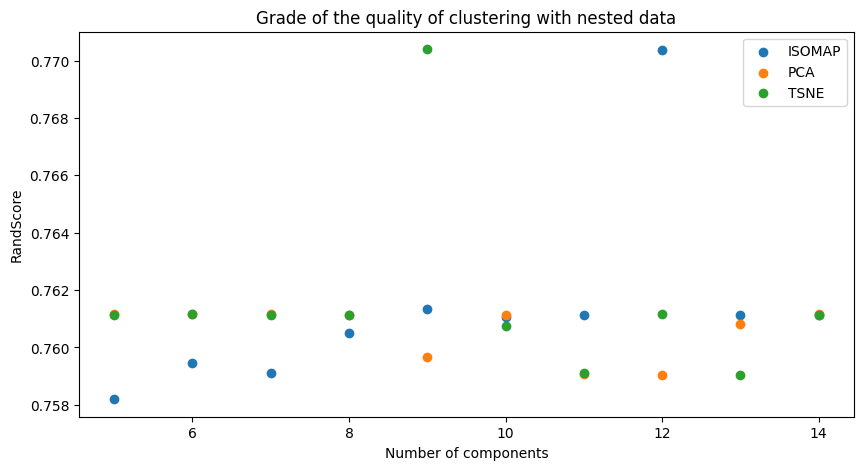

Кількість компонентів, точність з ISOMAP, точність з PCA, точність з T-SNE


In [40]:
# візуалізація результатів
plt.figure(figsize=(10, 5))
plt.scatter(d_range, isomap_score, label='ISOMAP')
plt.scatter(d_range, pca_score, label='PCA')
plt.scatter(d_range, tsne_score, label='TSNE')
plt.title("Grade of the quality of clustering with nested data")
plt.xlabel("Number of components")
plt.ylabel("RandScore")
plt.legend()
plt.show()
print(f'Кількість компонентів, точність з ISOMAP, точність з PCA, точність з T-SNE')

In [39]:
# вивід оцінок
for i, j in zip(d_range, range(0, 9)):
    print(f'{i}, {isomap_score[j]:.4f}, {pca_score[j]:.4f}, {tsne_score[j]:.4f}')

5, 0.7582, 0.7612, 0.7611
6, 0.7594, 0.7612, 0.7612
7, 0.7591, 0.7612, 0.7611
8, 0.7605, 0.7611, 0.7611
9, 0.7613, 0.7597, 0.7704
10, 0.7610, 0.7611, 0.7608
11, 0.7611, 0.7591, 0.7591
12, 0.7704, 0.7590, 0.7612
13, 0.7611, 0.7608, 0.7590
